In [151]:
import numpy as np
import pandas as pd

In [152]:
file="daily.csv"
df = pd.read_csv(file, sep=',')
df
df.describe(include="all")

,Date,Do,Start Time,End Time,Spend Time
count,57,57,57,57,57.000000
unique,6,14,35,35,NaN
top,1/6/20,Eat,9:15 AM,10:30 AM,NaN
freq,14,10,4,4,NaN
mean,NaN,NaN,NaN,NaN,2.245614
std,NaN,NaN,NaN,NaN,2.570650
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,2.000000


In [153]:
Sum=df.groupby(df.Do).sum()
Sum.sort_values(by=['Spend Time'])

,Spend Time
Do,
Wake,0.00
Housing,1.00
Shower,1.50
Buy Grocery,2.00
Breakfast,4.00
Movie,5.50
Youtube,5.75
Muisc,6.25
Friends,6.50


In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

totoal Eat time for week: 11.5
totoal study time for week: 21.25
totoal Youtube time for week: 5.75


Text(0, 0.5, 'Youtube time')

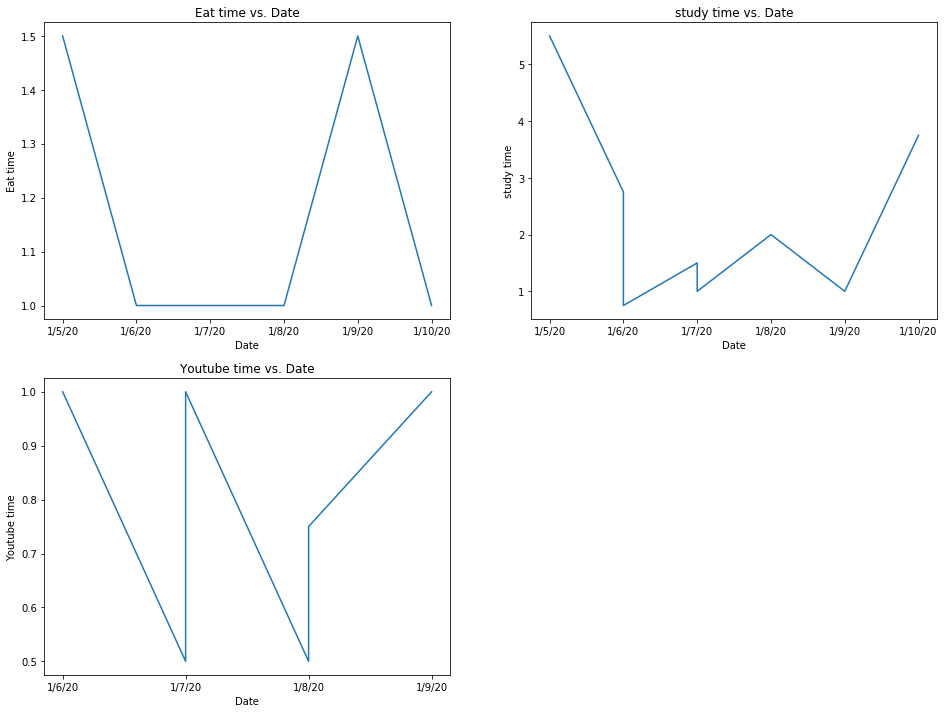

In [155]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2,2,1)

Eat = df["Do"]=="Eat"
ax1.plot(df[Eat]["Date"], df[Eat]["Spend Time"])
Eat_sum = df[Eat]["Spend Time"].sum()
print("totoal Eat time for week: {}".format(Eat_sum))
ax1.set_title("Eat time vs. Date")
# Add some axis labels.
ax1.set_xlabel("Date")
ax1.set_ylabel("Eat time")


ax2 = fig.add_subplot(2,2,2)

Study = df["Do"]=="Study"
ax2.plot(df[Study]["Date"], df[Study]["Spend Time"])
study_sum = df[Study]["Spend Time"].sum()
print("totoal study time for week: {}".format(study_sum))
ax2.set_title("study time vs. Date")
# Add some axis labels.
ax2.set_xlabel("Date")
ax2.set_ylabel("study time")

ax3 = fig.add_subplot(2,2,3)
Youtube = df["Do"]=="Youtube"
ax3.plot(df[Youtube]["Date"], df[Youtube]["Spend Time"])
Youtube_sum = df[Youtube]["Spend Time"].sum()
print("totoal Youtube time for week: {}".format(Youtube_sum))
ax3.set_title("Youtube time vs. Date")
# Add some axis labels.
ax3.set_xlabel("Date")
ax3.set_ylabel("Youtube time")

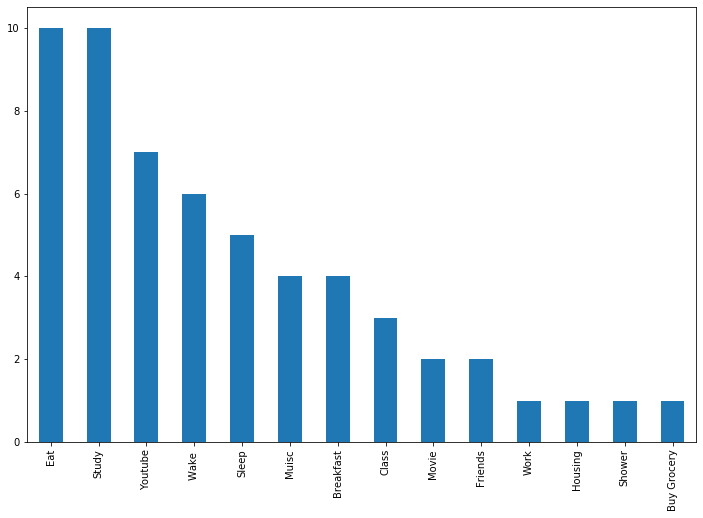

In [160]:
fig = plt.figure(figsize=(12, 8))
df["Do"].value_counts().plot(kind='bar')

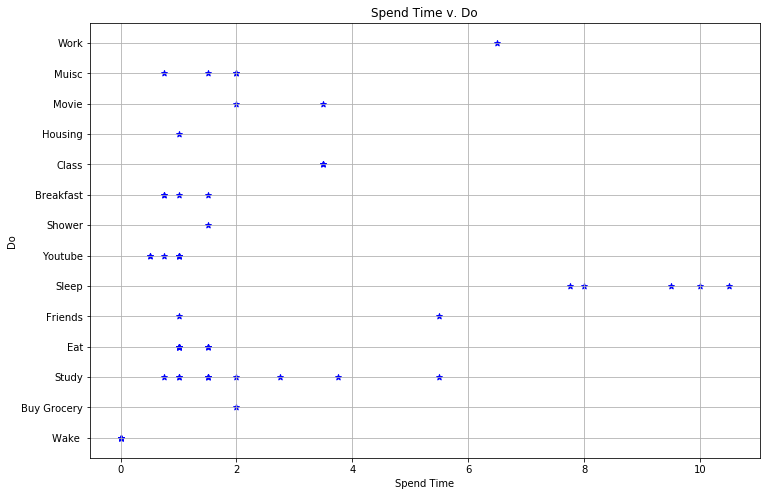

In [161]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df["Spend Time"], df["Do"], color="blue", marker="*")
plt.xlabel('Spend Time')
plt.ylabel('Do')
plt.title('Spend Time v. Do')
plt.grid(True)

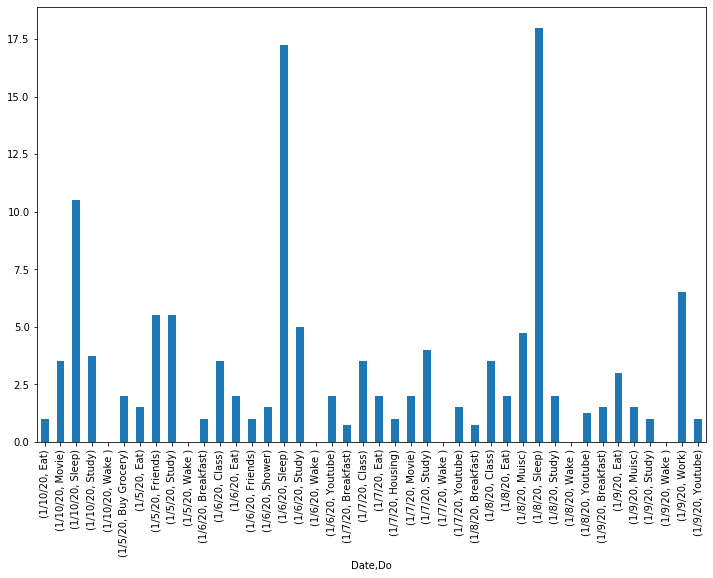

In [162]:
fig = plt.figure(figsize=(12, 8))
gg=df.groupby(["Date","Do"])["Spend Time"].sum()
plt.show(gg.plot(kind="bar"))